# Assess FuncX Performance
Measure how quickly we evaluate tasks

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

## Load in the Tox Screening Data
We are going to look at the DrugBank subset, which is only ~9000 entries. 

In [2]:
run_data = pd.read_csv('funcx_perf_test.csv')
print(f'Read {len(run_data)} inference records')

Read 67585 inference records


## Compute the Evaluation Rate Batch-wise
The SMILES strings are evaluated in multiple batches. We compute evaluation rate by dividing the batch run time by the number of molecules per batch

In [3]:
batch_runinfo = run_data.groupby('task_id').agg({'runtime': ['mean', 'count']})
print(f'Processed {len(batch_runinfo)} batches')

Processed 146 batches


In [4]:
batch_runinfo['eval_rate'] = batch_runinfo[('runtime', 'count')] / batch_runinfo[('runtime', 'mean')]
batch_runinfo['batch_size'] = batch_runinfo[('runtime', 'count')]

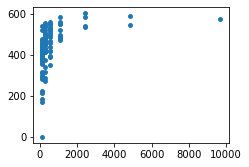

In [5]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

# Plot the individual batches
ax.scatter(batch_runinfo['batch_size'], batch_runinfo['eval_rate'], s=15)

*Finding*: It appears that batch sizes of around 2048 are optimal

## Compute Time to Evaluate 1B Molecules
We are going to use an estimate based on the 2048 batch size

In [6]:
eval_rate = batch_runinfo[batch_runinfo['batch_size'] > 2000]['eval_rate'].mean()
print(f'Estimated inference rate: {eval_rate : .2f} mol/node-s')

Estimated inference rate:  567.28 mol/node-s


In [7]:
inference_size = 1e9
node_count = 128
run_time = inference_size / (eval_rate * node_count) / 3600  # To get it in hours
print(f'Estimated screening time: {run_time : .1f} hrs')

Estimated screening time:  3.8 hrs
